In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Loading data and getting a quick summary from then.

In [2]:
df = pd.read_csv('data/Movie_classification.csv', header=0)
df.head()

,Marketing expense,Production expense,Multiplex coverage,Budget,Movie_length,Lead_ Actor_Rating,Lead_Actress_rating,Director_rating,Producer_rating,Critic_rating,Trailer_views,3D_available,Time_taken,Twitter_hastags,Genre,Avg_age_actors,Num_multiplex,Collection,Start_Tech_Oscar
0,20.1264,59.62,0.462,36524.125,138.7,7.825,8.095,7.910,7.995,7.94,527367,YES,109.60,223.840,Thriller,23,494,48000,1
1,20.5462,69.14,0.531,35668.655,152.4,7.505,7.650,7.440,7.470,7.44,494055,NO,146.64,243.456,Drama,42,462,43200,0
2,20.5458,69.14,0.531,39912.675,134.6,7.485,7.570,7.495,7.515,7.44,547051,NO,147.88,2022.400,Comedy,38,458,69400,1
3,20.6474,59.36,0.542,38873.890,119.3,6.895,7.035,6.920,7.020,8.26,516279,YES,185.36,225.344,Drama,45,472,66800,1
4,21.3810,59.36,0.542,39701.585,127.7,6.920,7.070,6.815,7.070,8.26,531448,NO,176.48,225.792,Drama,55,395,72400,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Marketing expense    506 non-null    float64
 1   Production expense   506 non-null    float64
 2   Multiplex coverage   506 non-null    float64
 3   Budget               506 non-null    float64
 4   Movie_length         506 non-null    float64
 5   Lead_ Actor_Rating   506 non-null    float64
 6   Lead_Actress_rating  506 non-null    float64
 7   Director_rating      506 non-null    float64
 8   Producer_rating      506 non-null    float64
 9   Critic_rating        506 non-null    float64
 10  Trailer_views        506 non-null    int64  
 11  3D_available         506 non-null    object 
 12  Time_taken           494 non-null    float64
 13  Twitter_hastags      506 non-null    float64
 14  Genre                506 non-null    object 
 15  Avg_age_actors       506 non-null    int

## Missing value imputation

In [4]:
df['Time_taken'].fillna(value=df['Time_taken'].mean(), inplace=True)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Marketing expense    506 non-null    float64
 1   Production expense   506 non-null    float64
 2   Multiplex coverage   506 non-null    float64
 3   Budget               506 non-null    float64
 4   Movie_length         506 non-null    float64
 5   Lead_ Actor_Rating   506 non-null    float64
 6   Lead_Actress_rating  506 non-null    float64
 7   Director_rating      506 non-null    float64
 8   Producer_rating      506 non-null    float64
 9   Critic_rating        506 non-null    float64
 10  Trailer_views        506 non-null    int64  
 11  3D_available         506 non-null    object 
 12  Time_taken           506 non-null    float64
 13  Twitter_hastags      506 non-null    float64
 14  Genre                506 non-null    object 
 15  Avg_age_actors       506 non-null    int

## Dummy variable creation

In [6]:
df = pd.get_dummies(df, columns=['3D_available', 'Genre'], drop_first=True)

In [7]:
df.head()

,Marketing expense,Production expense,Multiplex coverage,Budget,Movie_length,Lead_ Actor_Rating,Lead_Actress_rating,Director_rating,Producer_rating,Critic_rating,...,Time_taken,Twitter_hastags,Avg_age_actors,Num_multiplex,Collection,Start_Tech_Oscar,3D_available_YES,Genre_Comedy,Genre_Drama,Genre_Thriller
0,20.1264,59.62,0.462,36524.125,138.7,7.825,8.095,7.910,7.995,7.94,...,109.60,223.840,23,494,48000,1,1,0,0,1
1,20.5462,69.14,0.531,35668.655,152.4,7.505,7.650,7.440,7.470,7.44,...,146.64,243.456,42,462,43200,0,0,0,1,0
2,20.5458,69.14,0.531,39912.675,134.6,7.485,7.570,7.495,7.515,7.44,...,147.88,2022.400,38,458,69400,1,0,1,0,0
3,20.6474,59.36,0.542,38873.890,119.3,6.895,7.035,6.920,7.020,8.26,...,185.36,225.344,45,472,66800,1,1,0,1,0
4,21.3810,59.36,0.542,39701.585,127.7,6.920,7.070,6.815,7.070,8.26,...,176.48,225.792,55,395,72400,1,0,0,1,0


## Data and target split

In [8]:
data = df.drop('Start_Tech_Oscar', axis=1)
target = df['Start_Tech_Oscar']

In [9]:
data.head()

,Marketing expense,Production expense,Multiplex coverage,Budget,Movie_length,Lead_ Actor_Rating,Lead_Actress_rating,Director_rating,Producer_rating,Critic_rating,Trailer_views,Time_taken,Twitter_hastags,Avg_age_actors,Num_multiplex,Collection,3D_available_YES,Genre_Comedy,Genre_Drama,Genre_Thriller
0,20.1264,59.62,0.462,36524.125,138.7,7.825,8.095,7.910,7.995,7.94,527367,109.60,223.840,23,494,48000,1,0,0,1
1,20.5462,69.14,0.531,35668.655,152.4,7.505,7.650,7.440,7.470,7.44,494055,146.64,243.456,42,462,43200,0,0,1,0
2,20.5458,69.14,0.531,39912.675,134.6,7.485,7.570,7.495,7.515,7.44,547051,147.88,2022.400,38,458,69400,0,1,0,0
3,20.6474,59.36,0.542,38873.890,119.3,6.895,7.035,6.920,7.020,8.26,516279,185.36,225.344,45,472,66800,1,0,1,0
4,21.3810,59.36,0.542,39701.585,127.7,6.920,7.070,6.815,7.070,8.26,531448,176.48,225.792,55,395,72400,0,0,1,0


In [10]:
target.head()

0    1
1    0
2    1
3    1
4    1
Name: Start_Tech_Oscar, dtype: int64

## Test-train split

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
train_data, test_data, train_target, test_target = train_test_split(
    data,
    target,
    test_size=0.2,
    random_state=1,
)

## Training a Classification Tree

In [13]:
from sklearn.tree import DecisionTreeClassifier

In [14]:
classification_tree = DecisionTreeClassifier(max_depth=3)

In [15]:
classification_tree.fit(train_data, train_target)

DecisionTreeClassifier(max_depth=3)

In [16]:
train_target_predicted = classification_tree.predict(train_data)
test_target_predicted = classification_tree.predict(test_data)

## Evaluating model performance

In [17]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [18]:
confusion_matrix(train_target, train_target_predicted)

array([[176,   1],
       [155,  72]])

In [19]:
confusion_matrix(test_target, test_target_predicted)

array([[47,  6],
       [35, 14]])

In [20]:
accuracy_score(test_target, test_target_predicted)

0.5980392156862745

## Plotting decision tree

In [21]:
from sklearn.tree import export_graphviz

In [22]:
dot_data = export_graphviz(
    classification_tree,
    out_file=None,
    feature_names=train_data.columns,
    filled=True
)

In [23]:
from IPython.display import Image
import pydotplus

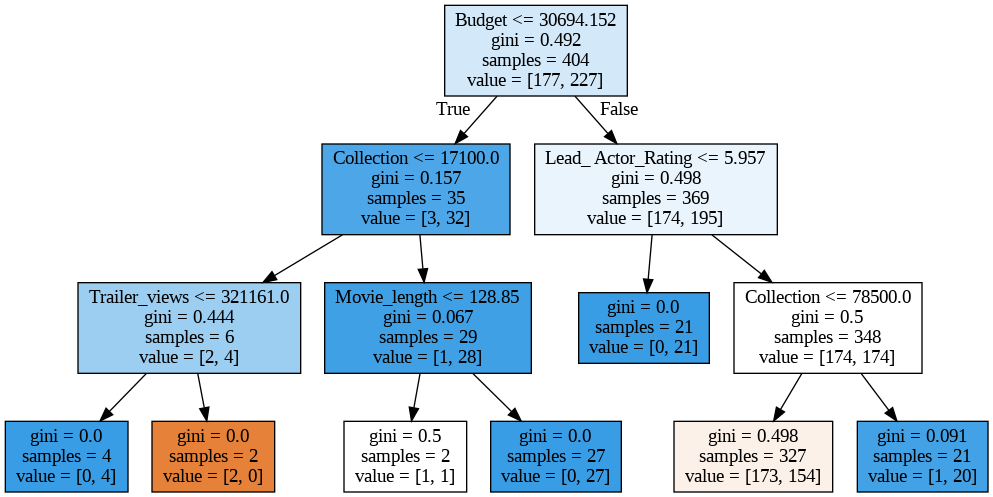

In [24]:
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

## Controlling tree growth

In [25]:
def get_tree_image(tree):
    dot_data = export_graphviz(
        tree,
        out_file=None,
        feature_names=train_data.columns,
        filled=True,
    )

    graph = pydotplus.graph_from_dot_data(dot_data)
    return Image(graph.create_png())

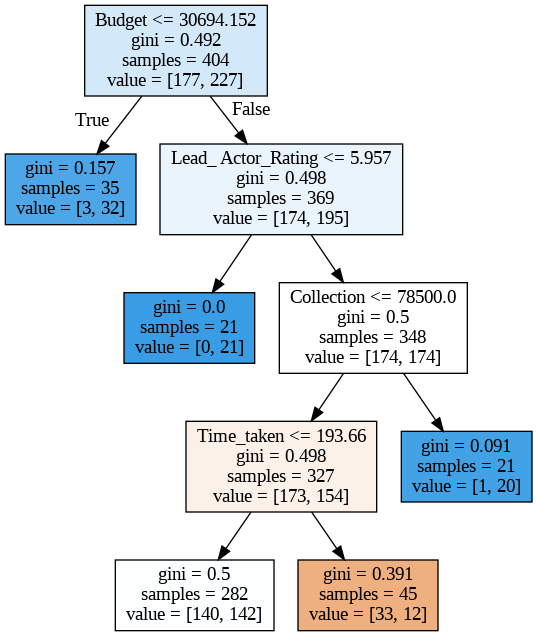

In [26]:
classification_tree_1 = DecisionTreeClassifier(min_samples_leaf=20, max_depth=4)
classification_tree_1.fit(train_data, train_target)
get_tree_image(classification_tree_1)

In [27]:
accuracy_score(test_target, classification_tree_1.predict(test_data))

0.5098039215686274

## Bagging

In [28]:
from sklearn.ensemble import BaggingClassifier

In [29]:
classification_tree = DecisionTreeClassifier()

In [30]:
bagging_classifier = BaggingClassifier(
    base_estimator=classification_tree,
    n_estimators=1000,
    bootstrap=True,
    n_jobs=2,
    random_state=1,
)

In [31]:
bagging_classifier.fit(train_data, train_target)

BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=1000,
                  n_jobs=2, random_state=1)

In [32]:
confusion_matrix(test_target, bagging_classifier.predict(test_data))

array([[31, 22],
       [17, 32]])

In [33]:
accuracy_score(test_target, bagging_classifier.predict(test_data))

0.6176470588235294

## Random Forest

In [34]:
from sklearn.ensemble import RandomForestClassifier

In [35]:
random_forest_classifier = RandomForestClassifier(
    n_estimators=1000,
    n_jobs=2,
    random_state=1,
)

In [36]:
random_forest_classifier.fit(train_data, train_target)

RandomForestClassifier(n_estimators=1000, n_jobs=2, random_state=1)

In [37]:
confusion_matrix(test_target, random_forest_classifier.predict(test_data))

array([[27, 26],
       [20, 29]])

In [38]:
accuracy_score(test_target, random_forest_classifier.predict(test_data))

0.5490196078431373

## Grid Search

In [39]:
from sklearn.model_selection import GridSearchCV

In [40]:
random_forest_classifier = RandomForestClassifier(
    n_estimators=551,
    random_state=1,
)

In [41]:
params_grid = {
    'max_features': range(4, 11),
    'min_samples_split': [2, 3, 10]
}

grid_search = GridSearchCV(
    random_forest_classifier,
    params_grid,
    n_jobs=2,
    cv=5,
    scoring='accuracy',
    verbose=True,
)

In [42]:
grid_search.fit(train_data, train_target)

Fitting 5 folds for each of 21 candidates, totalling 105 fits


GridSearchCV(cv=5,
             estimator=RandomForestClassifier(n_estimators=551, random_state=1),
             n_jobs=2,
             param_grid={'max_features': range(4, 11),
                         'min_samples_split': [2, 3, 10]},
             scoring='accuracy', verbose=True)

In [43]:
grid_search.best_params_

{'max_features': 10, 'min_samples_split': 10}

In [44]:
best_random_forest_classifier = grid_search.best_estimator_

In [45]:
accuracy_score(test_target, best_random_forest_classifier.predict(test_data))

0.5980392156862745

## Gradient Boosting

In [46]:
from sklearn.ensemble import GradientBoostingClassifier

In [47]:
gradient_boosting_classifier = GradientBoostingClassifier()
gradient_boosting_classifier.fit(train_data, train_target)

GradientBoostingClassifier()

In [48]:
accuracy_score(test_target, gradient_boosting_classifier.predict(test_data))

0.5294117647058824

In [49]:
gradient_boosting_classifier2 = GradientBoostingClassifier(
    learning_rate=0.2,
    n_estimators=1000,
    max_depth=1,
)
gradient_boosting_classifier2.fit(train_data, train_target)

GradientBoostingClassifier(learning_rate=0.2, max_depth=1, n_estimators=1000)

In [50]:
accuracy_score(train_target, gradient_boosting_classifier2.predict(train_data))

0.9381188118811881

In [51]:
accuracy_score(test_target, gradient_boosting_classifier2.predict(test_data))

0.5392156862745098

## Ada Boost

In [52]:
from sklearn.ensemble import AdaBoostClassifier

In [53]:
ada_boost_classifier = AdaBoostClassifier(learning_rate=0.02, n_estimators=5000)

In [54]:
ada_boost_classifier.fit(train_data, train_target)

AdaBoostClassifier(learning_rate=0.02, n_estimators=5000)

In [55]:
accuracy_score(train_target, ada_boost_classifier.predict(train_data))

0.9034653465346535

In [56]:
accuracy_score(test_target, ada_boost_classifier.predict(test_data))

0.5196078431372549

In [57]:
ada_boost_classifier2 = AdaBoostClassifier(
    random_forest_classifier,
    learning_rate=0.05,
    n_estimators=500
)

In [58]:
ada_boost_classifier2.fit(train_data, train_target)

AdaBoostClassifier(base_estimator=RandomForestClassifier(n_estimators=551,
                                                         random_state=1),
                   learning_rate=0.05, n_estimators=500)

In [59]:
accuracy_score(test_target, ada_boost_classifier2.predict(test_data))

0.5882352941176471

## XGBoost

In [60]:
from xgboost import XGBClassifier, plot_importance

In [61]:
xgboost_classifier = XGBClassifier(
    max_depth=5,
    n_estimators=10000,
    learning_rate=0.3,
    n_jobs=2,
)

In [62]:
xgboost_classifier.fit(train_data, train_target)

/opt/conda/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
[00:05:26] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.3, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=10000, n_jobs=2, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [63]:
accuracy_score(test_target, xgboost_classifier.predict(test_data))

0.5588235294117647

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

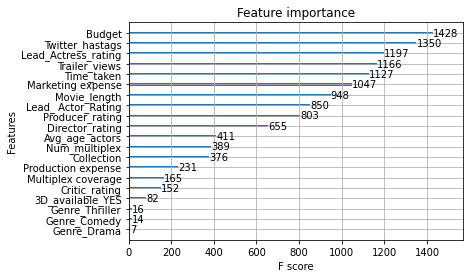

In [64]:
plot_importance(xgboost_classifier)